In [1]:
using Distributions
using StatsPlots
default(fmt=:png)
using Random
using QuadGK

tstat(dist, sample) = (mean(sample) - mean(dist))/√(var(sample)/length(sample))
chisqstat(dist, sample) = (length(sample) - 1) * var(sample)/var(dist)

function plot_tstat(;
        n = 10,
        L = 10^5,
        dist = Normal(1, 2),
        xlim = (-5, 5),
        xtick = -5:5,
        bin = range(extrema(xtick)...; length=51),
        skewnessfunc = skewness
    )
    T = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for i in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        T[i] = tstat(dist, rand!(dist, tmp[Threads.threadid()]))
    end
    histogram(T; norm=true, alpha=0.3, label="(x - μ)/√(u²/n)", xlim, xtick, bin)
    plot!(TDist(n-1); lw=1.5, label="TDist(n - 1)")
    sk = skewnessfunc(dist)
    diststr = replace("$dist", r"\{.*\}"=>"")
    title!("$diststr,  n = $n\nskewness = $(round(sk; digits=3))"; titlefontsize=10)
end

function plot_chisqstat(;
        n = 10,
        L = 10^5,
        dist = Normal(1, 2),
        kurtosisfunc = kurtosis
    )
    X = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for i in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X[i] = chisqstat(dist, rand!(dist, tmp[Threads.threadid()]))
    end
    m, s = mean(X), std(X)
    xlim = (max(-1, m - 4s), n + 4s)
    bin = range(0, xlim[2]; length=round(Int, 51/(1 - xlim[1]/xlim[2])))
    histogram(X; norm=true, alpha=0.3, label="(n - 1)u²/σ²", xlim, bin)
    plot!(Chisq(n-1); lw=1.5, label="Chisq(n - 1)")
    kurt = kurtosisfunc(dist)
    if isfinite(kurt)
        M, S = n - 1, (n - 1)*√((kurt + 3)/n - (n - 3)/(n*(n - 1)))
        plot!(Normal(M, S); lw=1.5, ls=:dash, label="normal dist.")
    end
    diststr = replace("$dist", r"\{.*\}"=>"")
    title!("$diststr,  n = $n\nkurtosis = $(round(kurt; digits=3))"; titlefontsize=10)
end

function plot_both(;
        n = 10,
        L = 10^5,
        dist = Normal(1, 2),
        xlim1 = (-5, 5),
        xtick1 = -5:5,
        bin1 = range(extrema(xtick1)...; length=51),
        skewnessfunc = skewness,
        kurtosisfunc = kurtosis,
        kwargs...
    )
    P = plot_tstat(; n, L, dist, xlim=xlim1, xtick=xtick1, bin=bin1, skewnessfunc)
    Q = plot_chisqstat(; n, L, dist, kurtosisfunc)
    plot(P, Q; size=(800, 300), kwargs...)
end

function myskewness(dist)
    μ, σ = mean(dist), std(dist)
    f(x) = ((x - μ)/σ)^3 * pdf(dist, x)
    quadgk(f, extrema(dist)...)[1]
end

function mykurtosis(dist)
    μ, σ = mean(dist), std(dist)
    f(x) = ((x - μ)/σ)^4 * pdf(dist, x)
    quadgk(f, extrema(dist)...)[1] - 3
end

mykurtosis (generic function with 1 method)

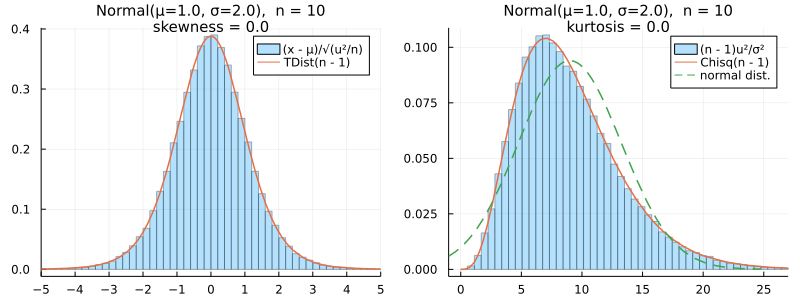

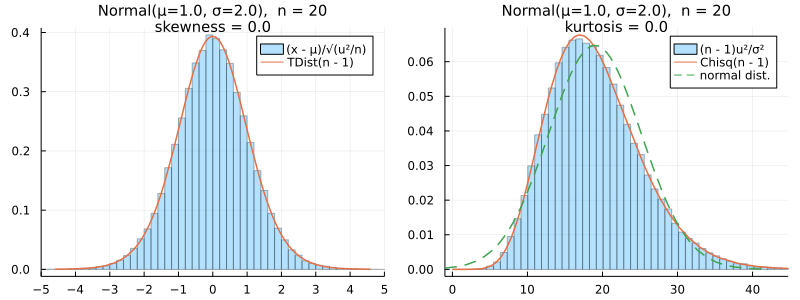

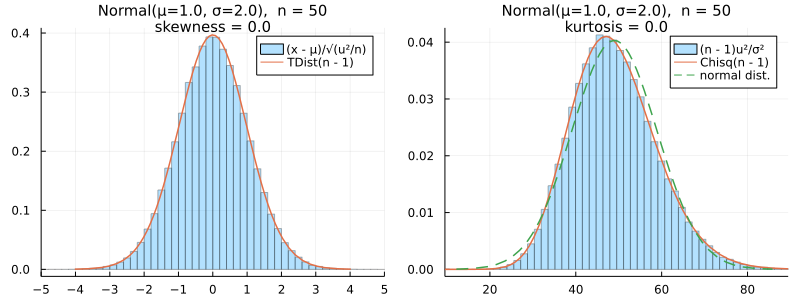

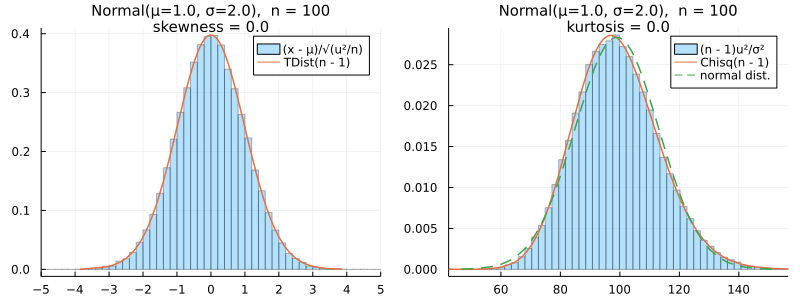

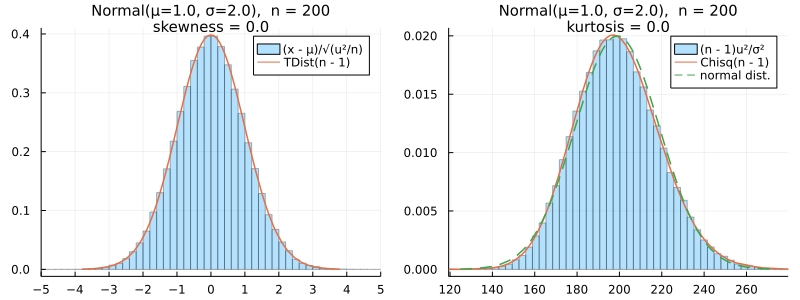

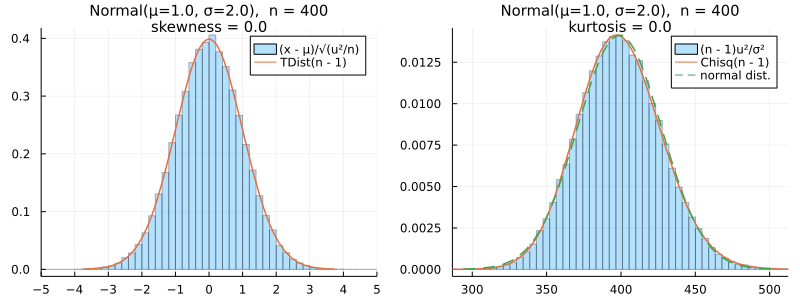

In [2]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; n) |> display
end

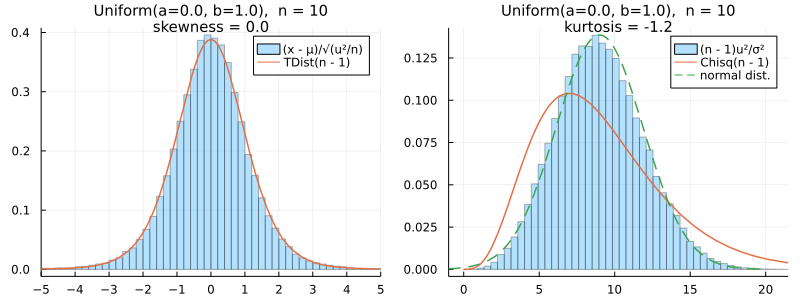

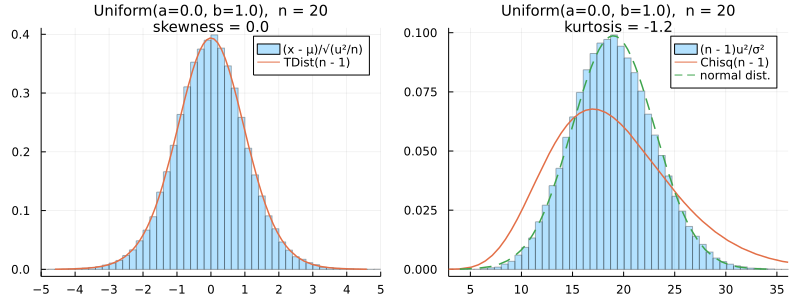

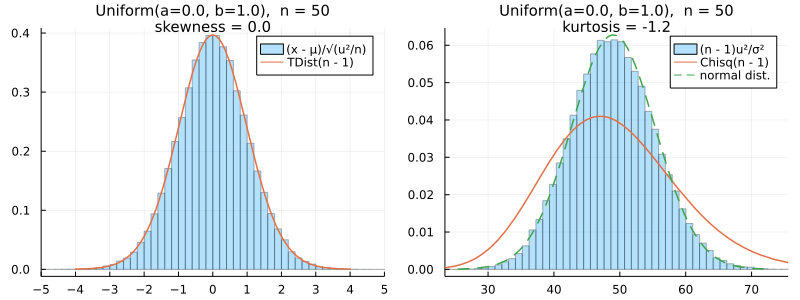

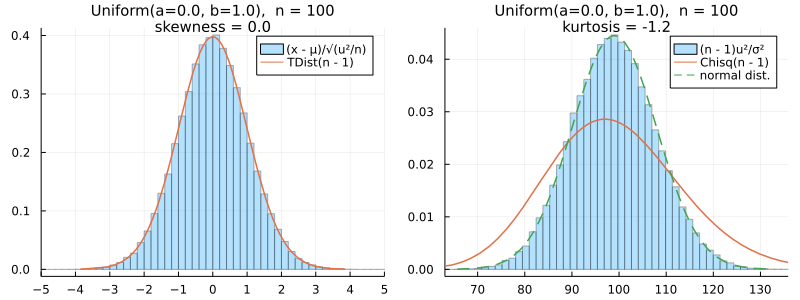

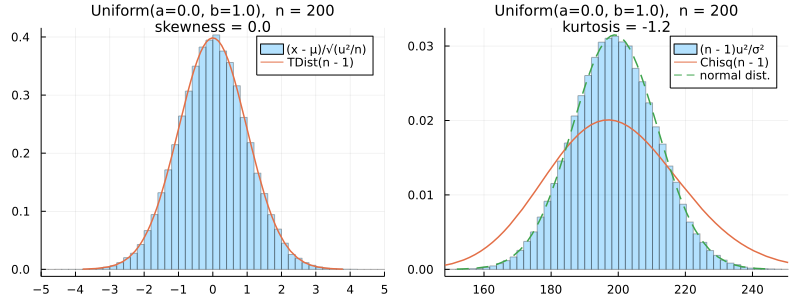

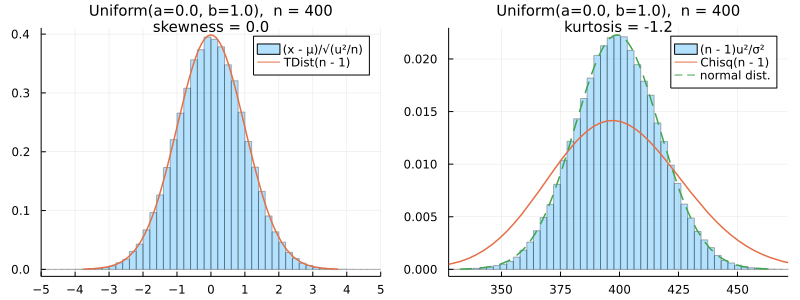

In [3]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Uniform(0, 1), n) |> display
end

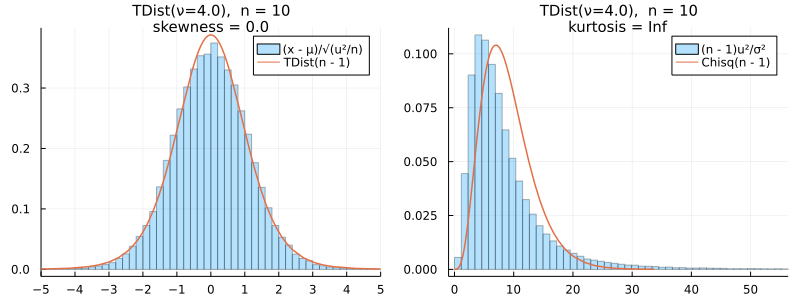

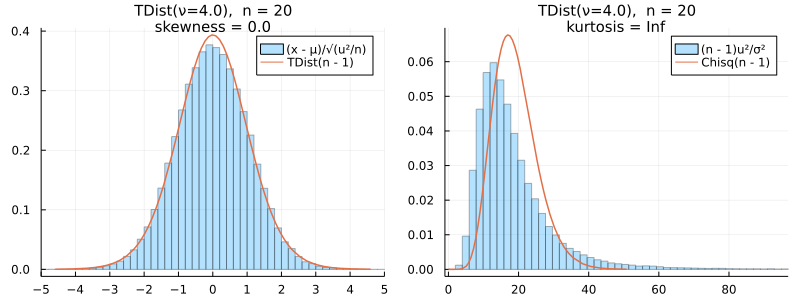

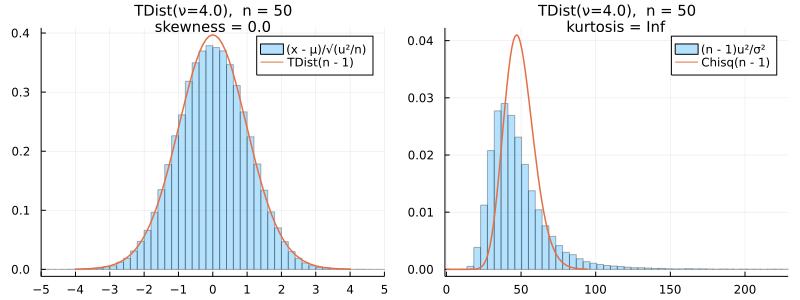

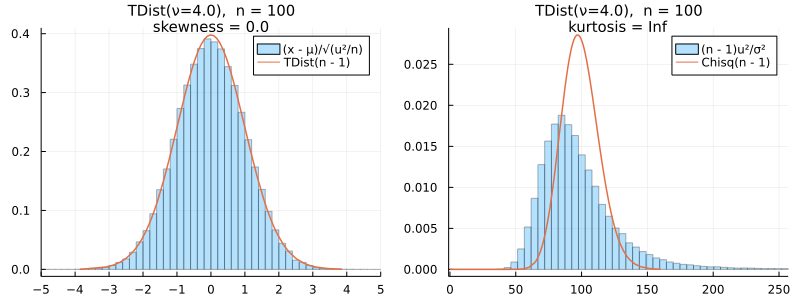

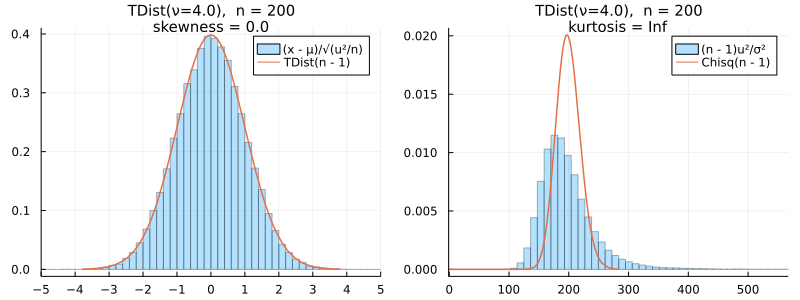

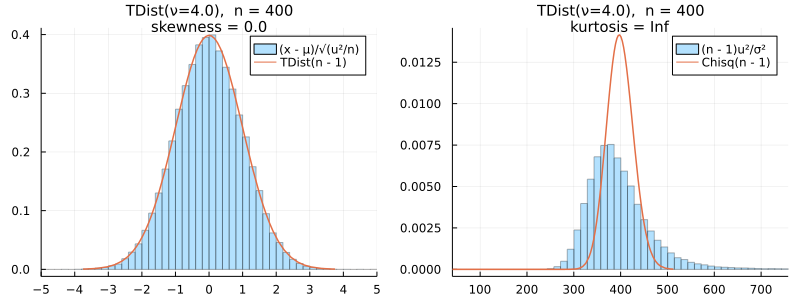

In [4]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = TDist(4), n, kurtosisfunc = kurtosis) |> display
end

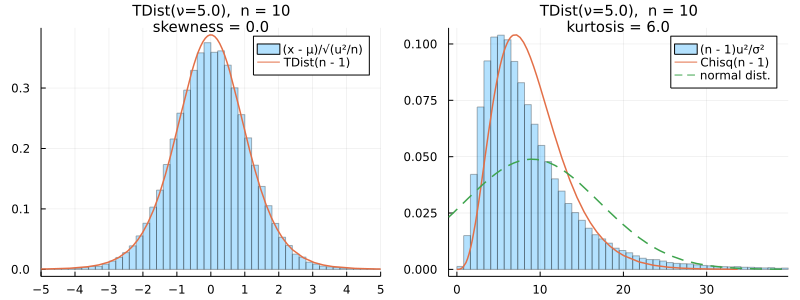

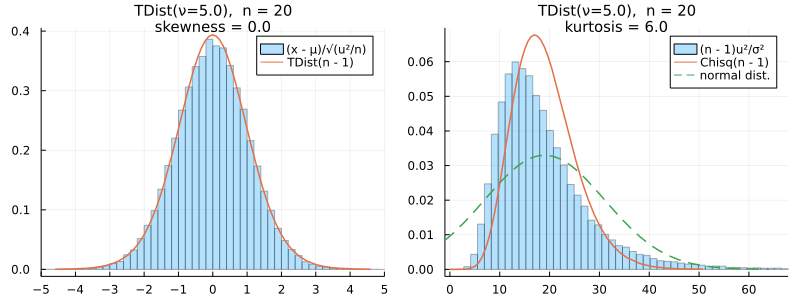

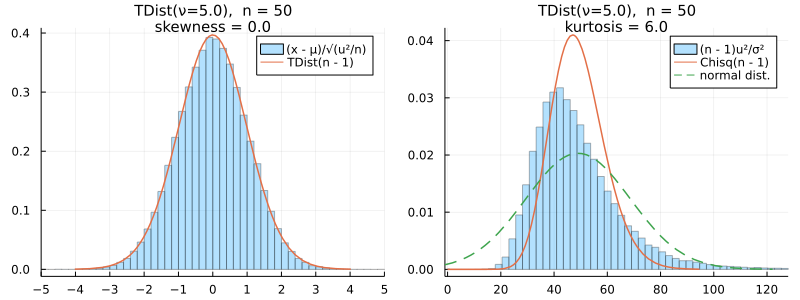

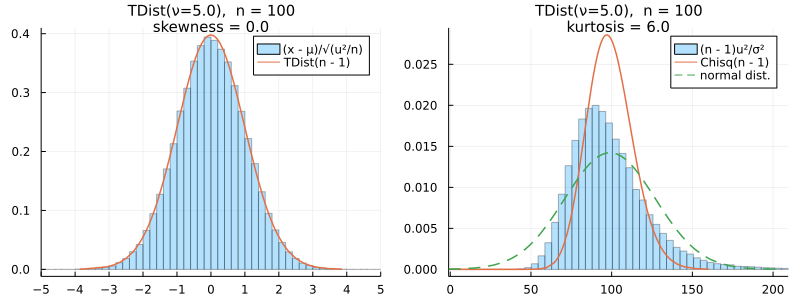

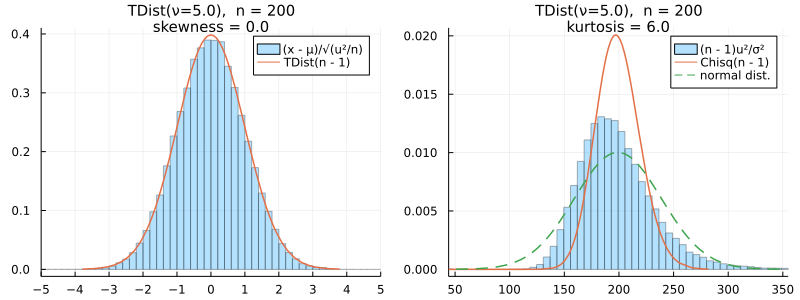

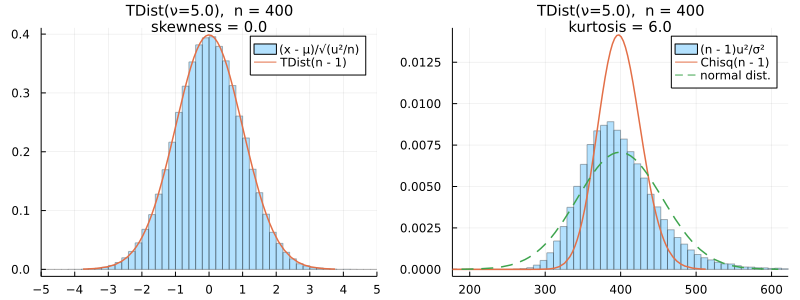

In [5]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = TDist(5), n) |> display
end

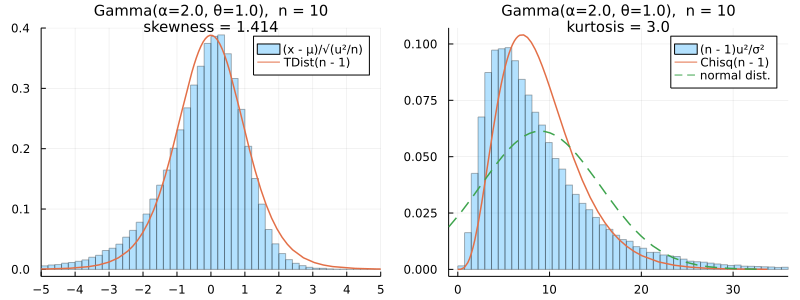

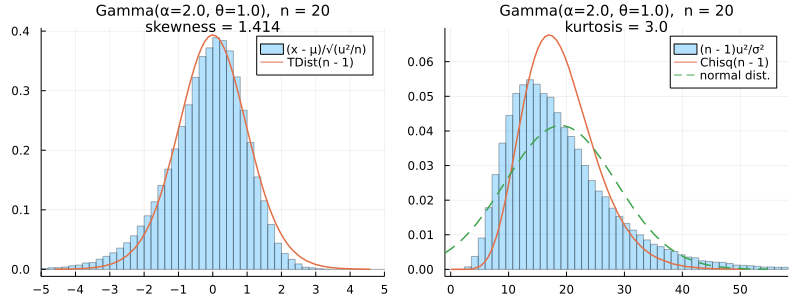

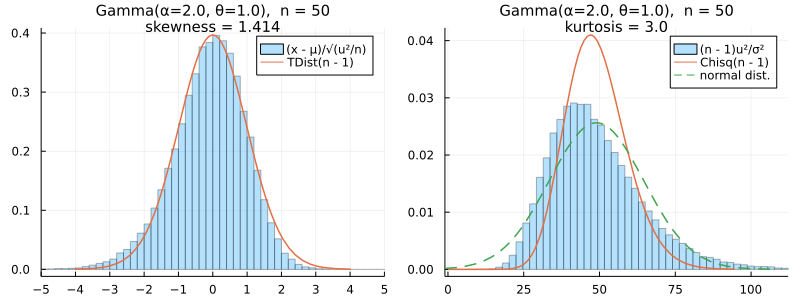

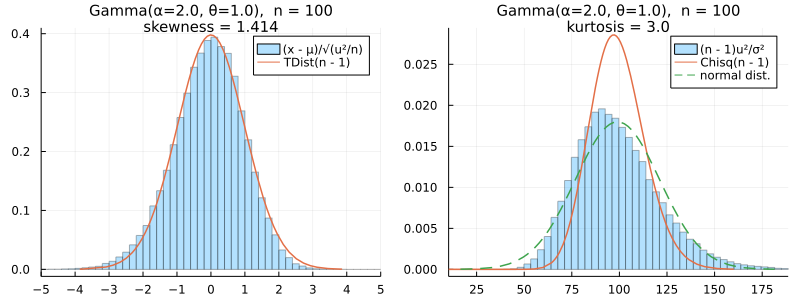

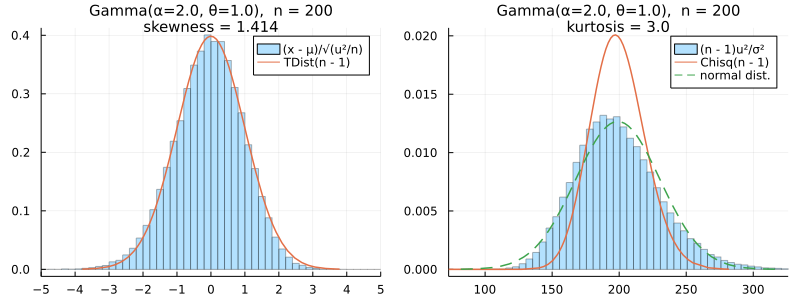

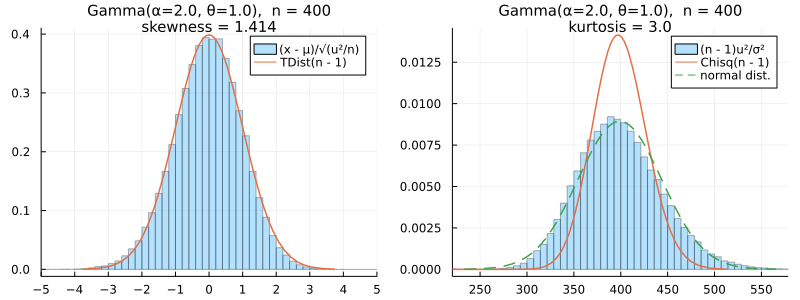

In [6]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Gamma(2, 1), n) |> display
end

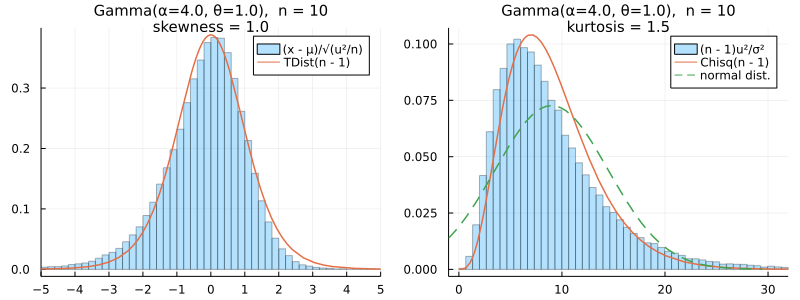

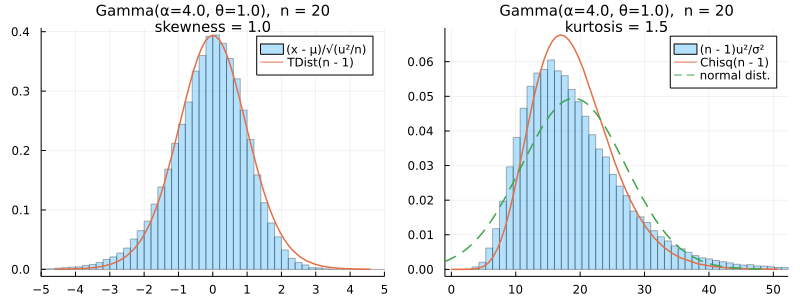

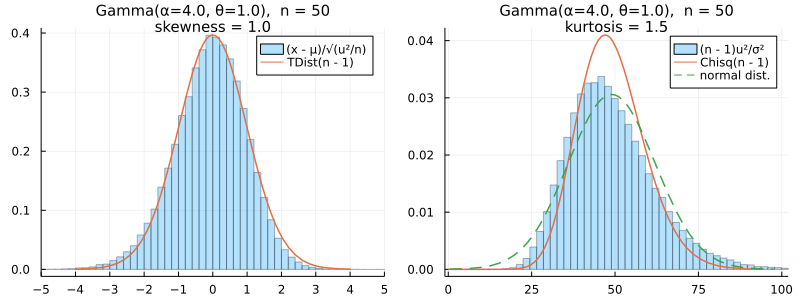

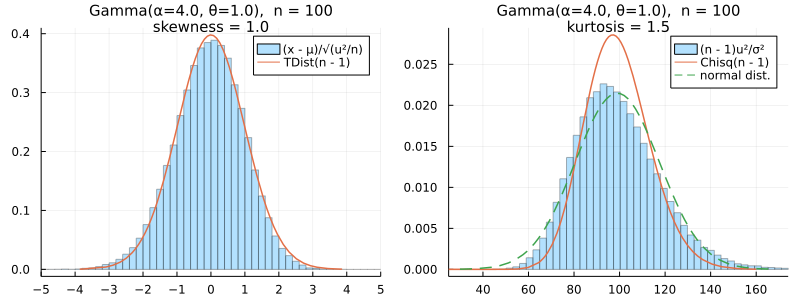

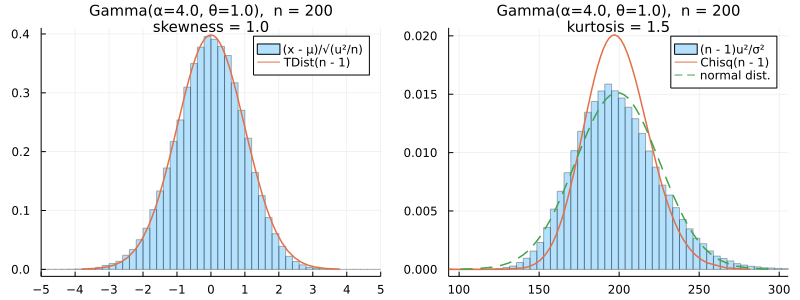

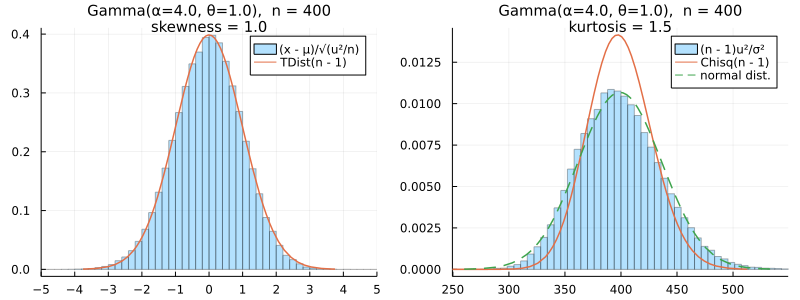

In [7]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Gamma(4, 1), n) |> display
end

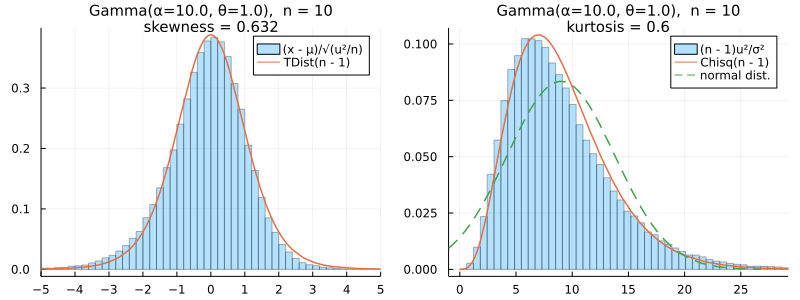

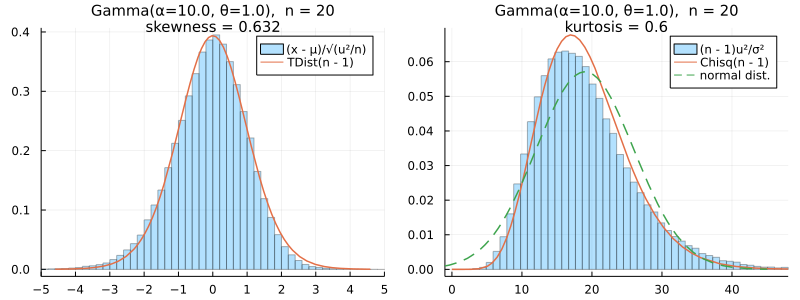

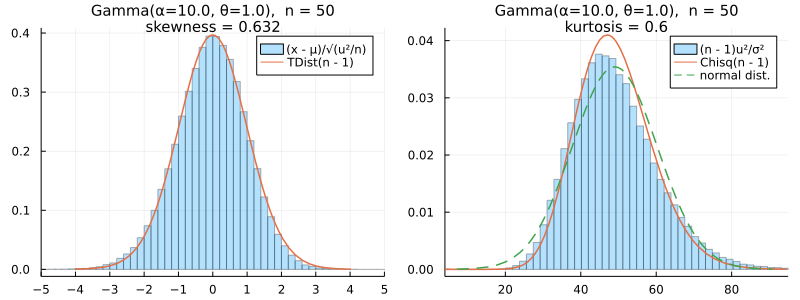

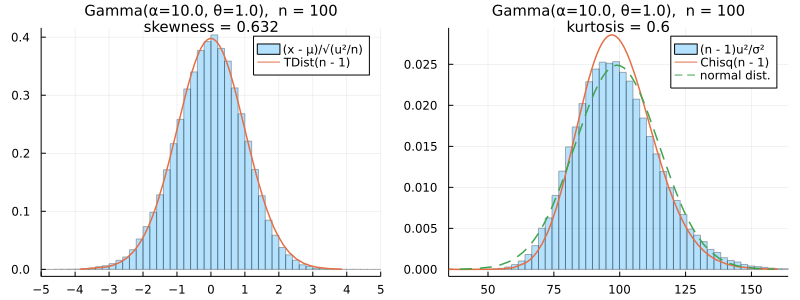

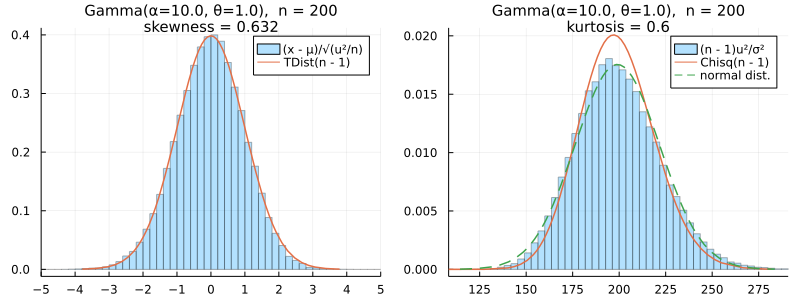

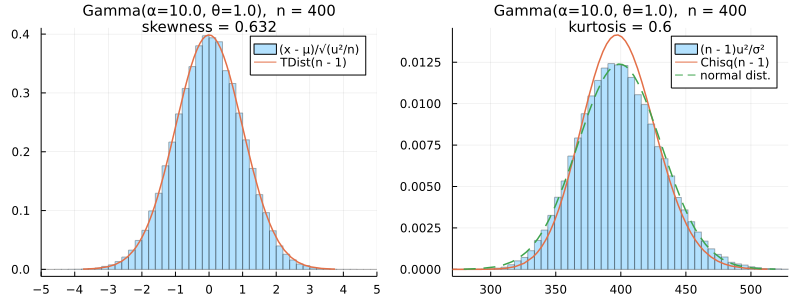

In [8]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Gamma(10, 1), n) |> display
end

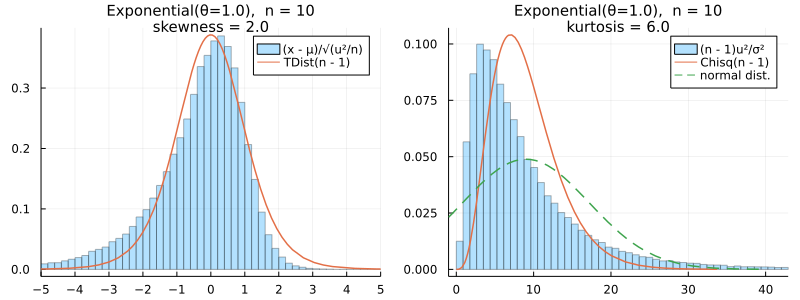

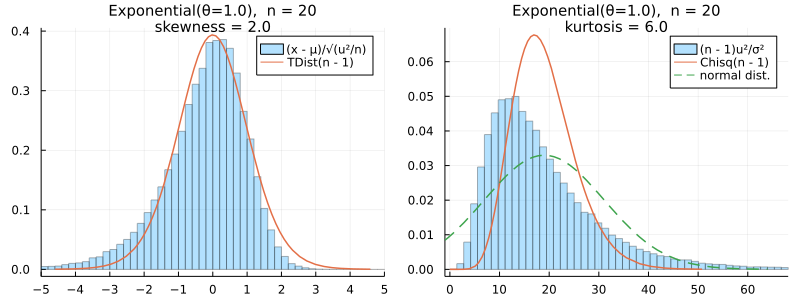

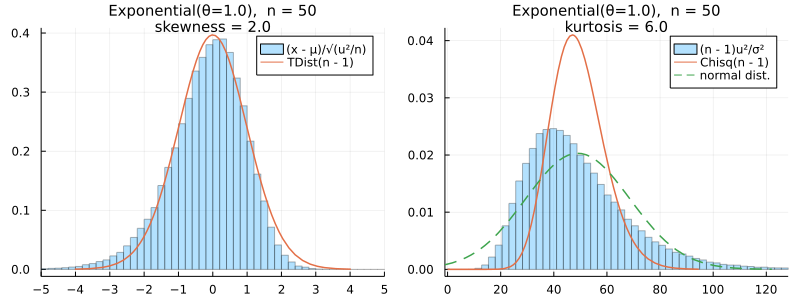

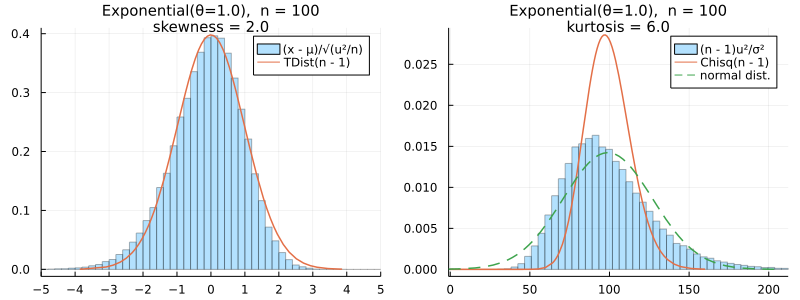

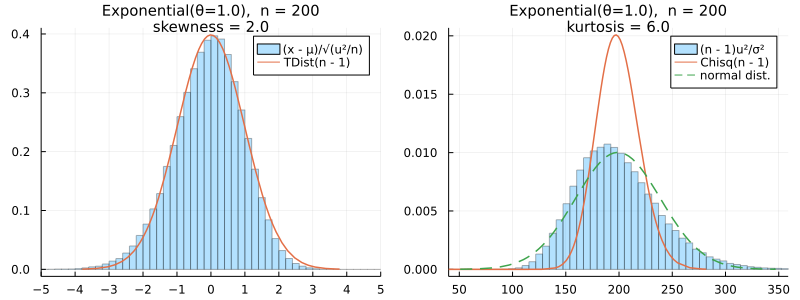

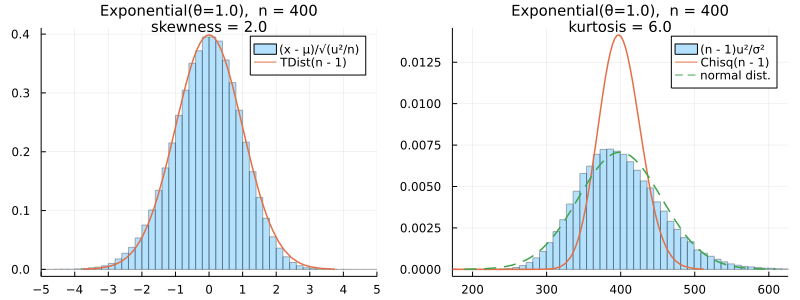

In [9]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Exponential(), n) |> display
end

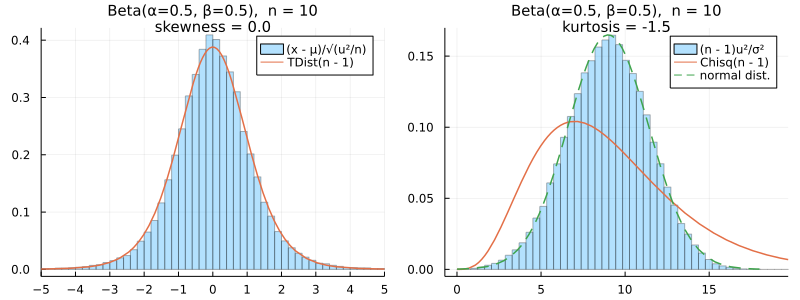

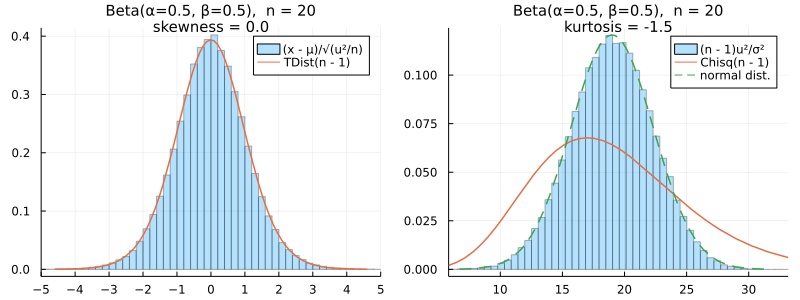

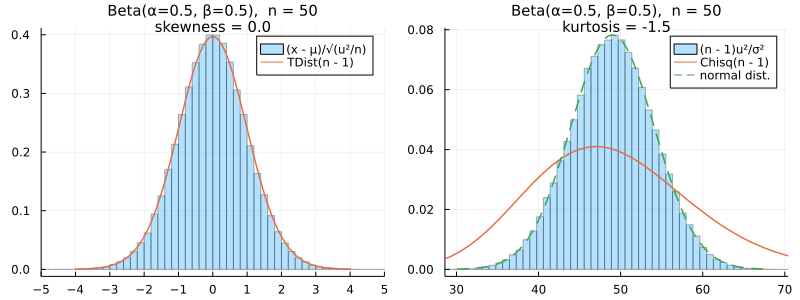

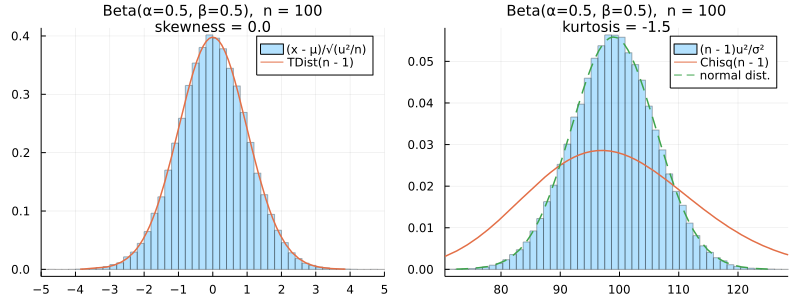

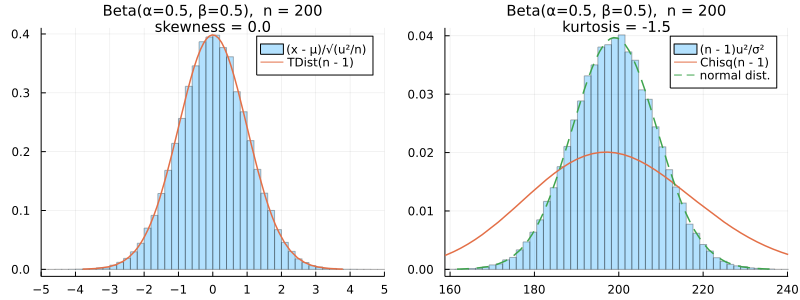

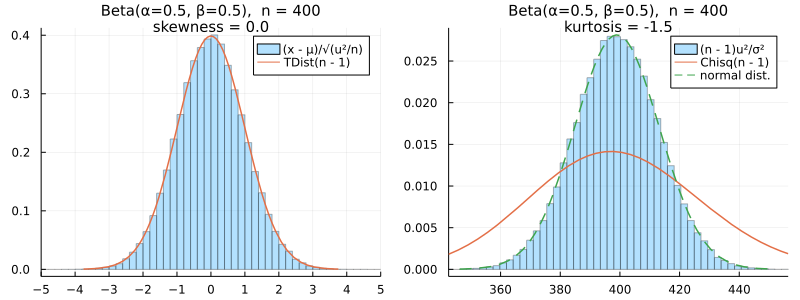

In [10]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Beta(0.5, 0.5), n) |> display
end

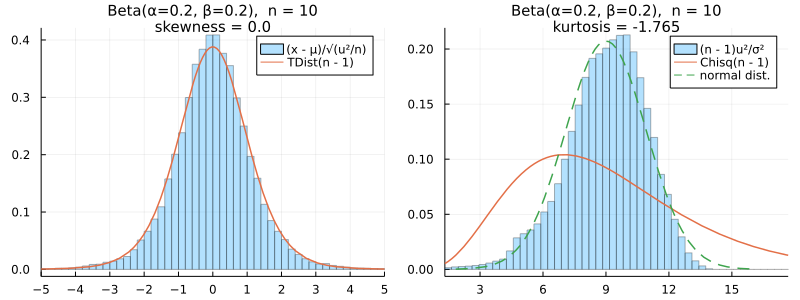

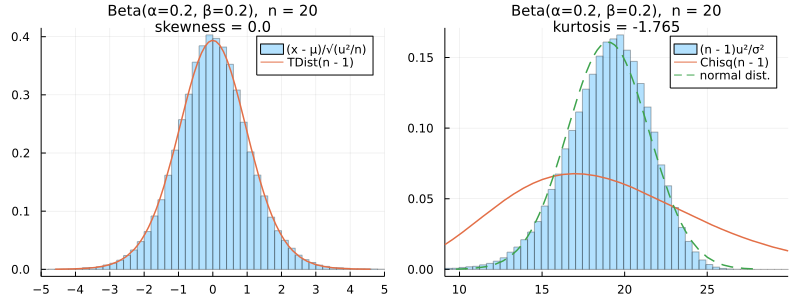

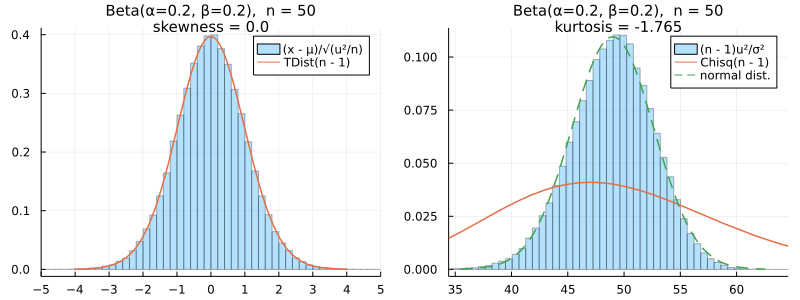

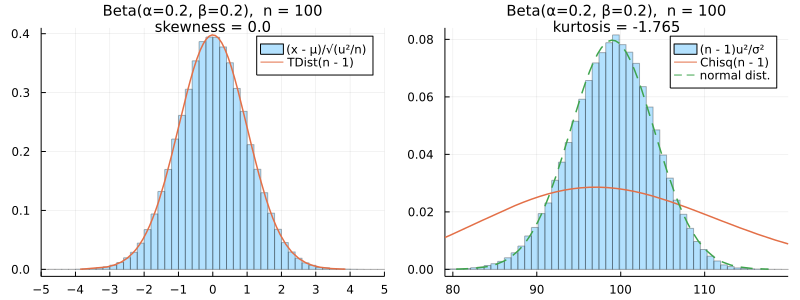

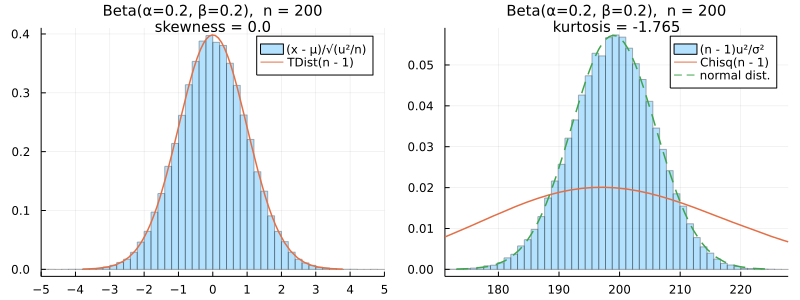

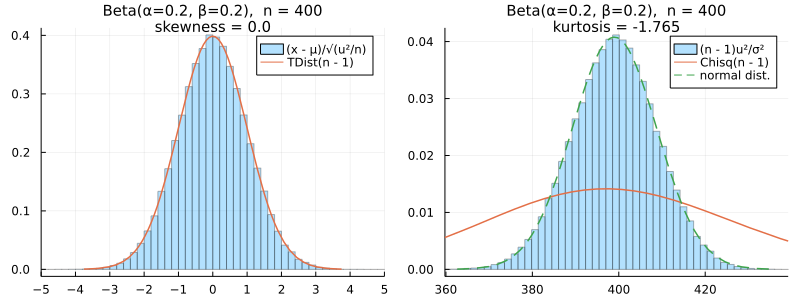

In [11]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Beta(0.2, 0.2), n) |> display
end

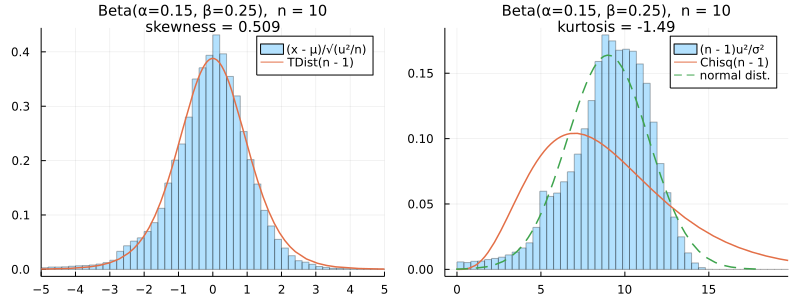

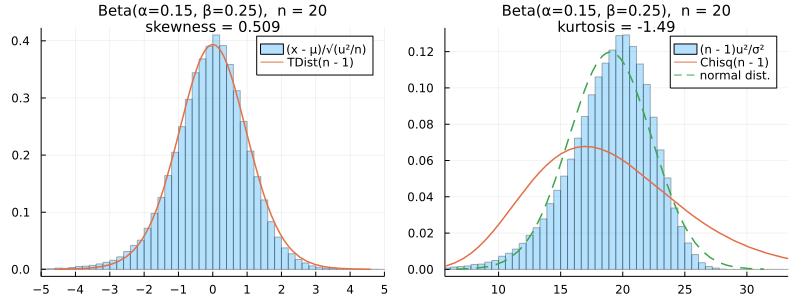

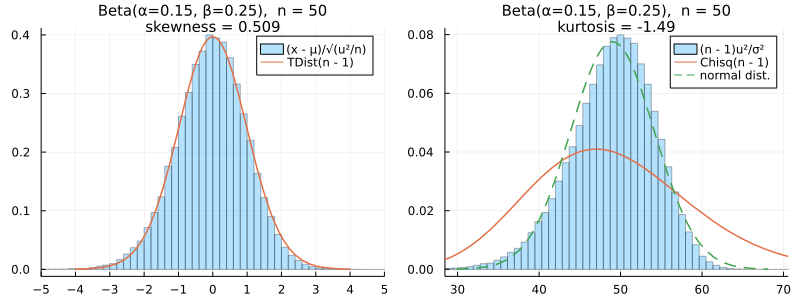

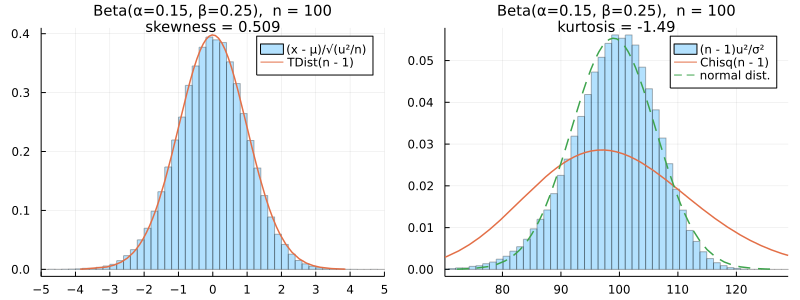

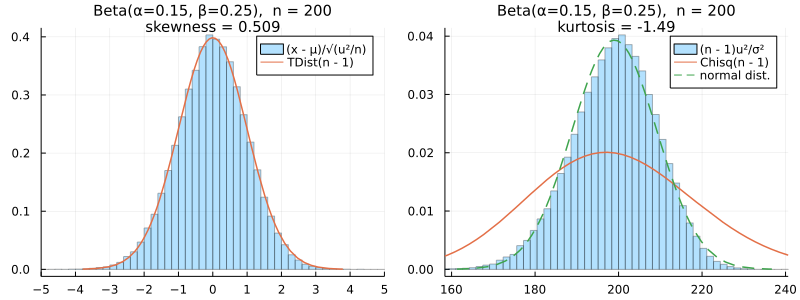

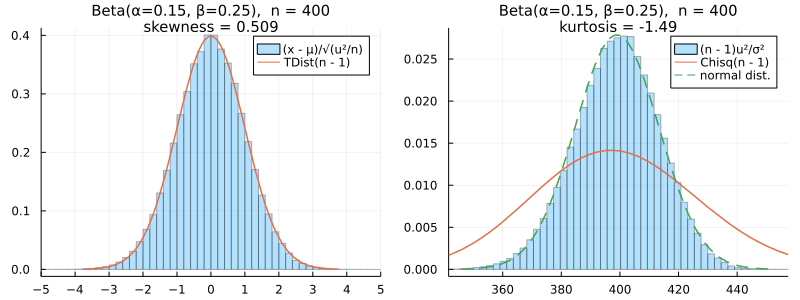

In [12]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Beta(0.15, 0.25), n) |> display
end

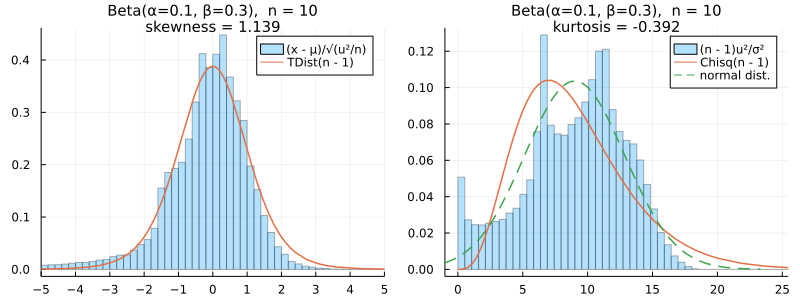

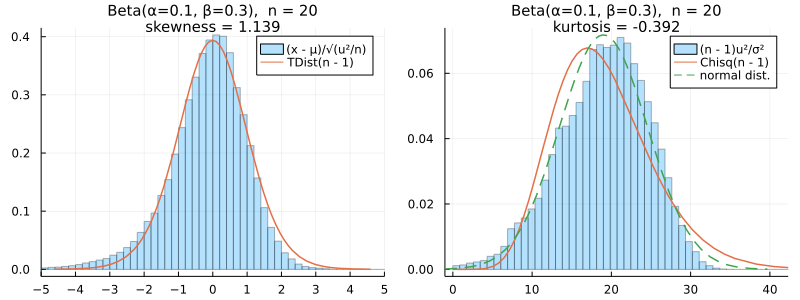

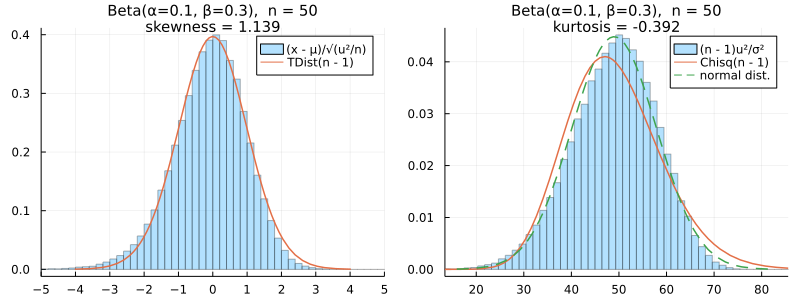

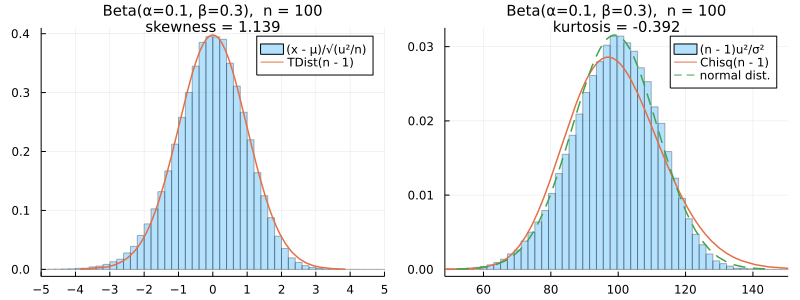

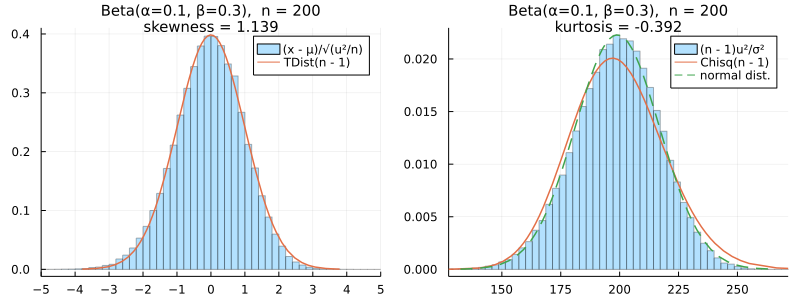

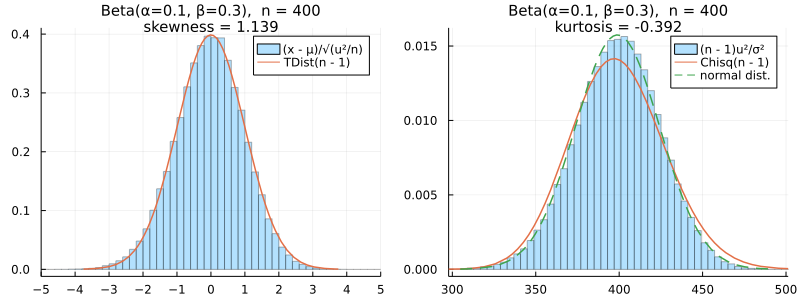

In [13]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Beta(0.1, 0.3), n) |> display
end

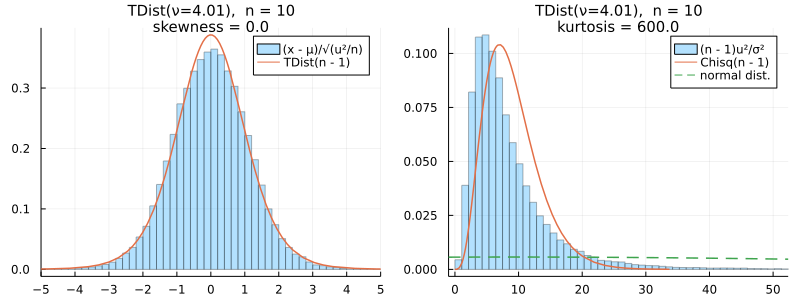

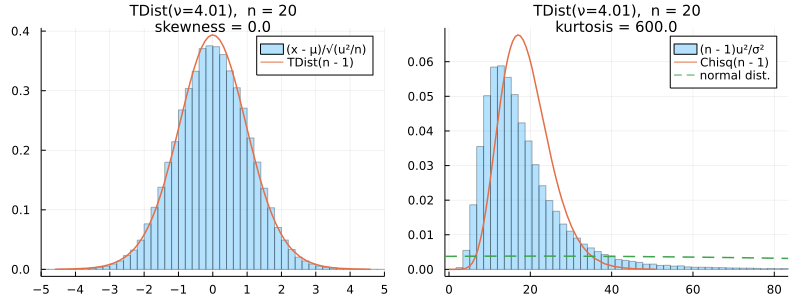

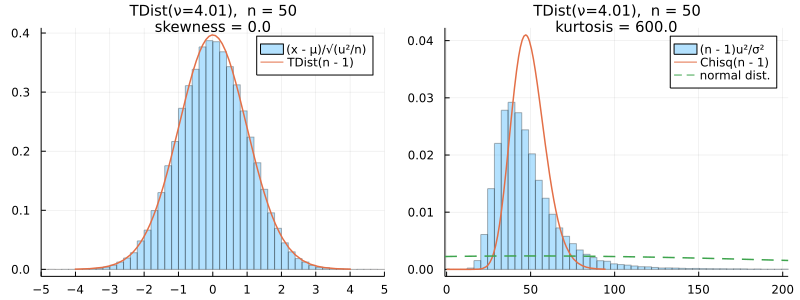

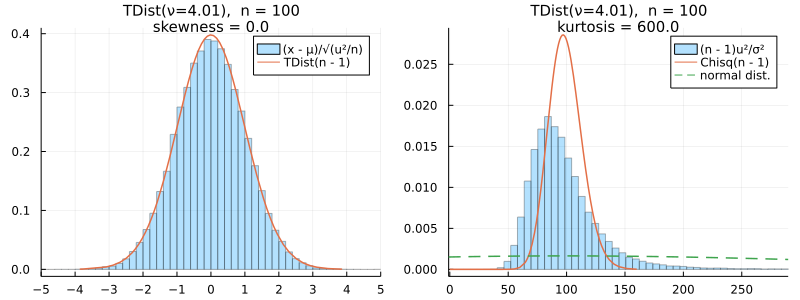

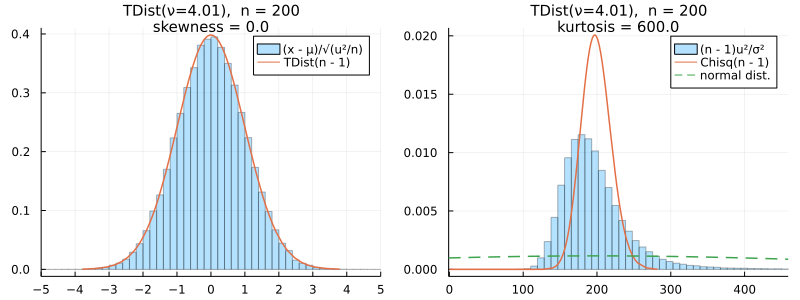

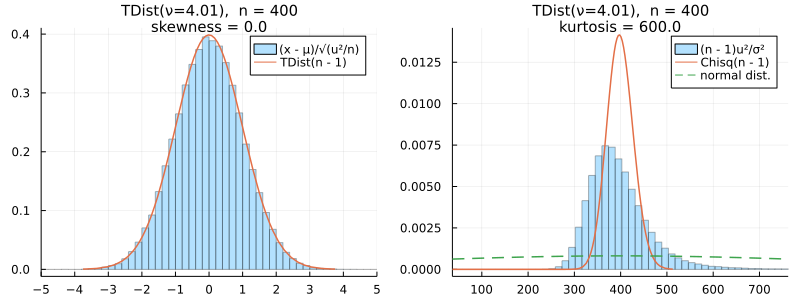

In [14]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = TDist(4.01), n) |> display
end

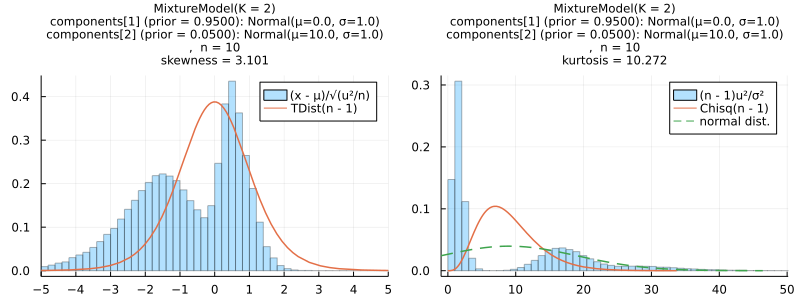

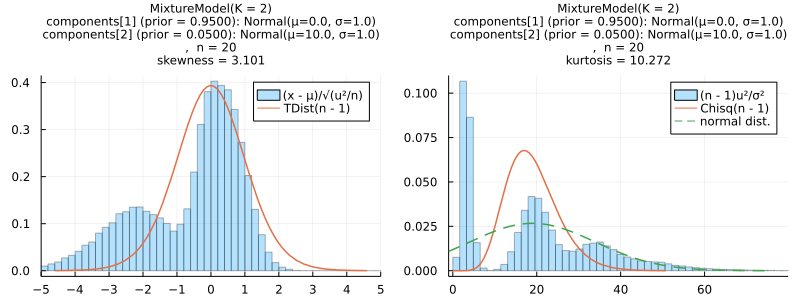

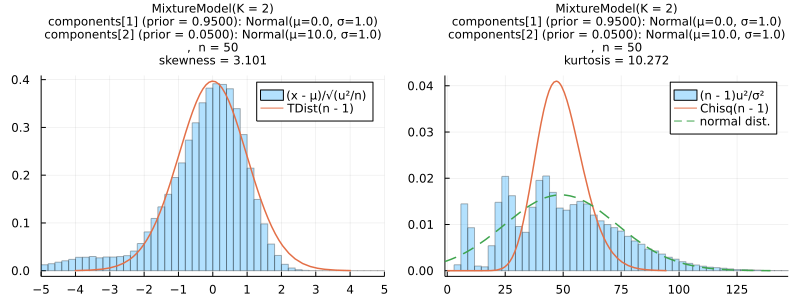

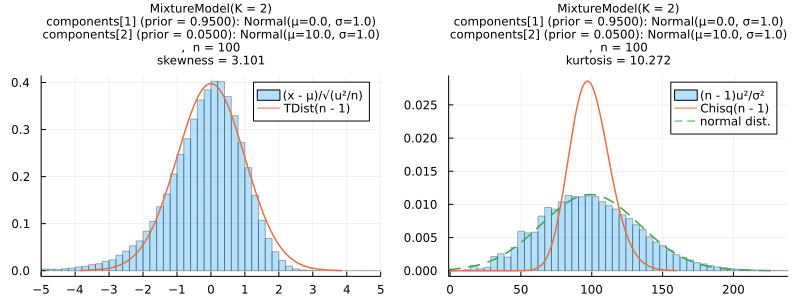

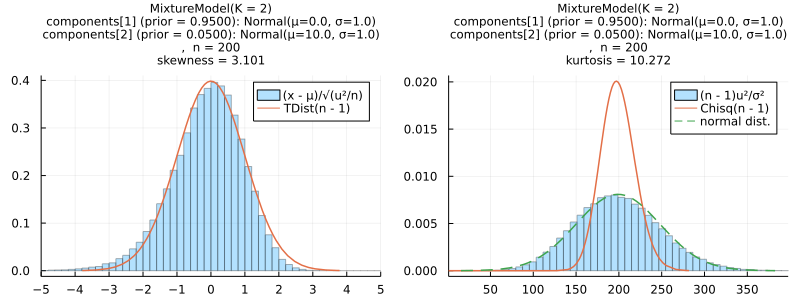

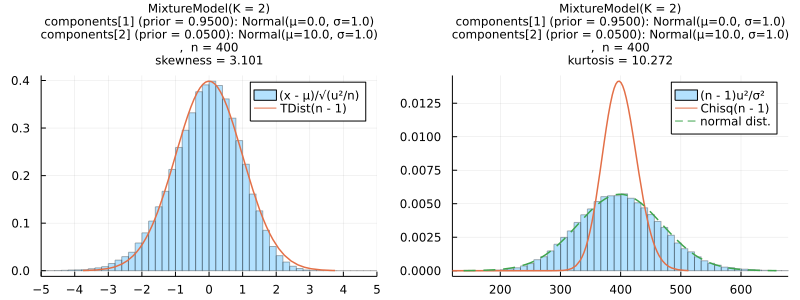

In [15]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = MixtureModel([Normal(), Normal(10, 1)], [0.95, 0.05]), n,
        skewnessfunc=myskewness, kurtosisfunc=mykurtosis,
        titlefontsize=8, topmargin=1Plots.cm) |> display
end

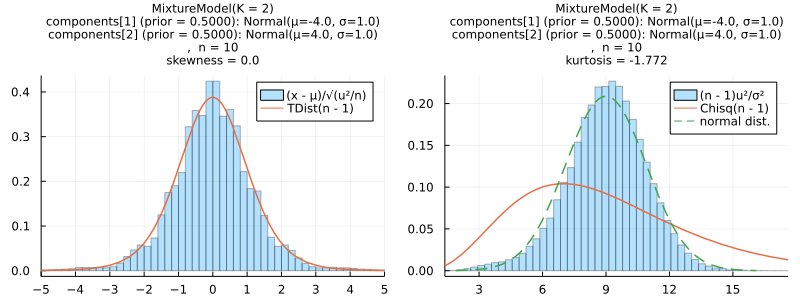

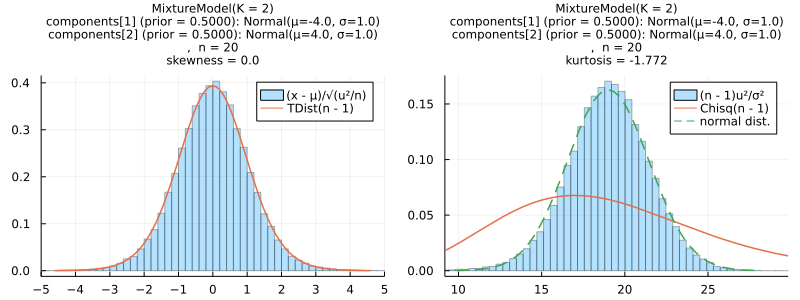

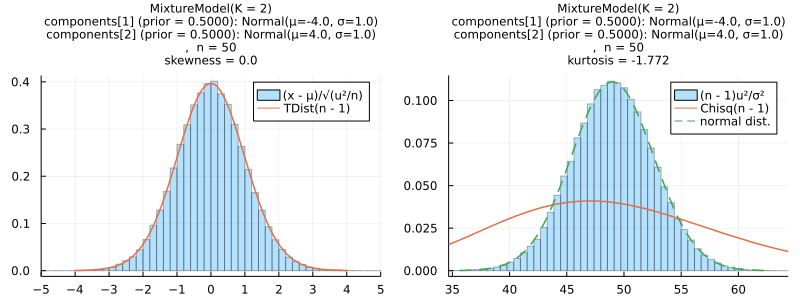

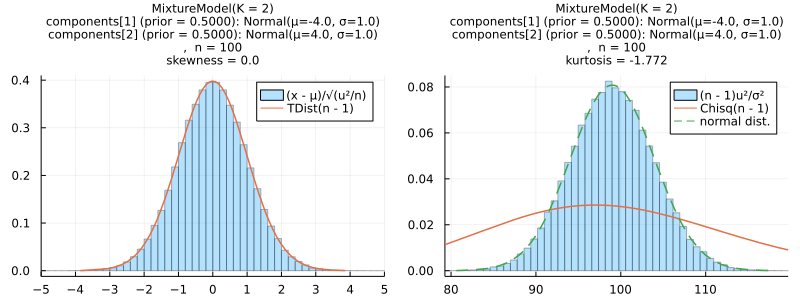

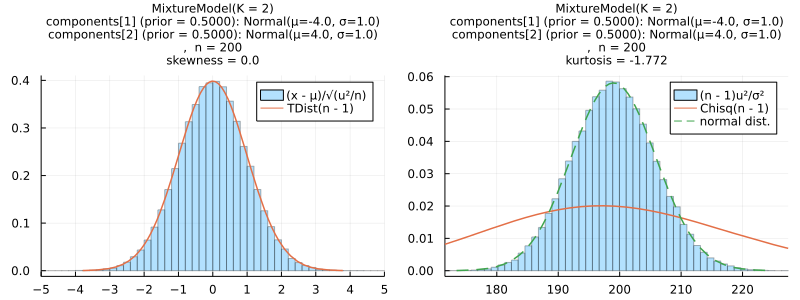

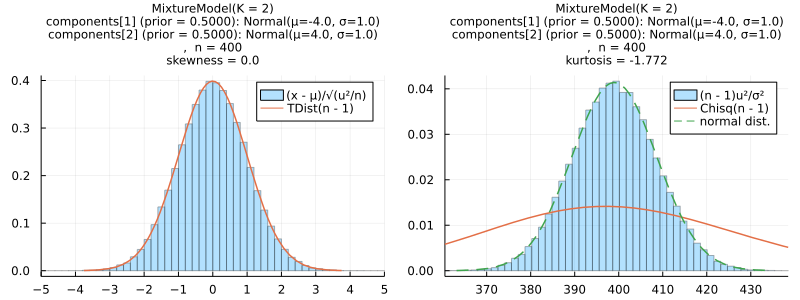

In [16]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = MixtureModel([Normal(-4, 1), Normal(4, 1)], [0.5, 0.5]), n,
        skewnessfunc=myskewness, kurtosisfunc=mykurtosis,
        titlefontsize=8, topmargin=1Plots.cm) |> display
end

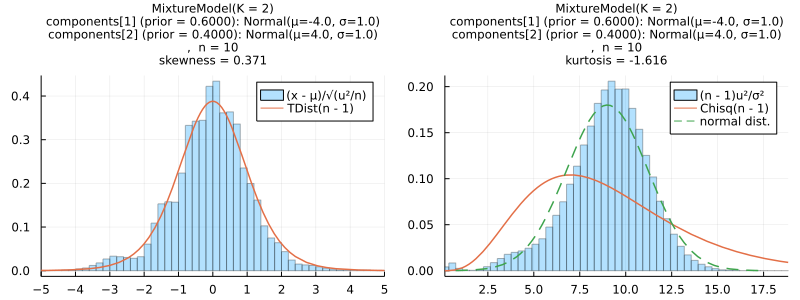

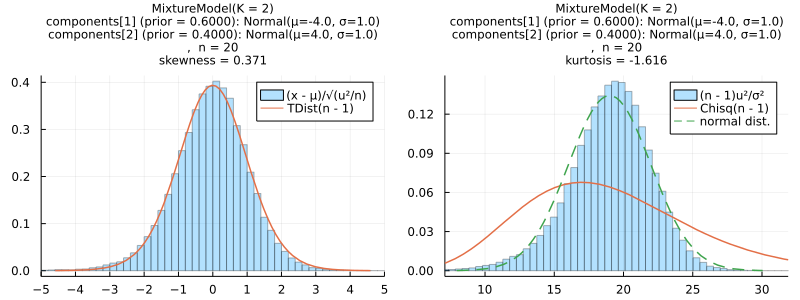

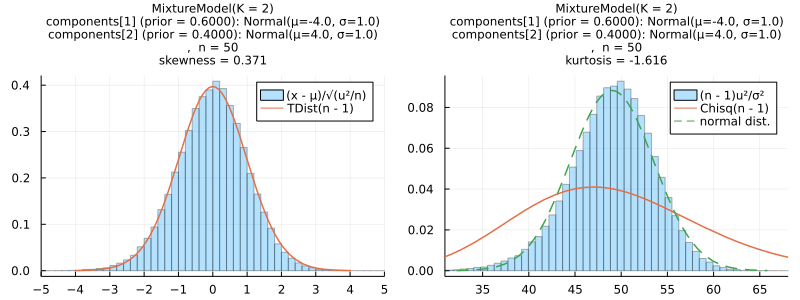

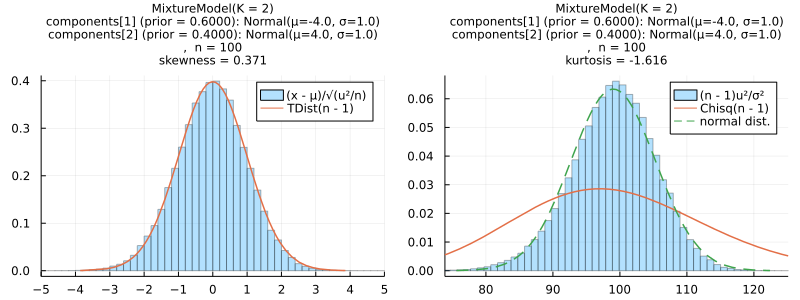

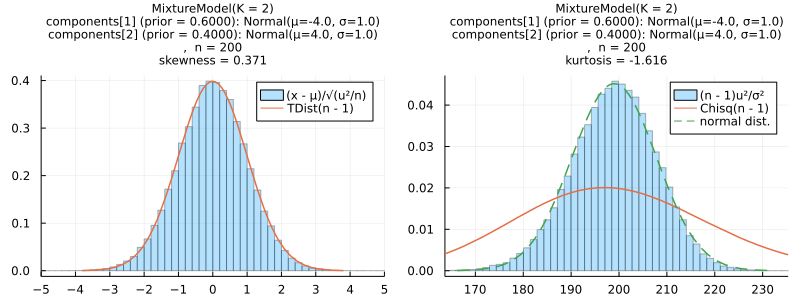

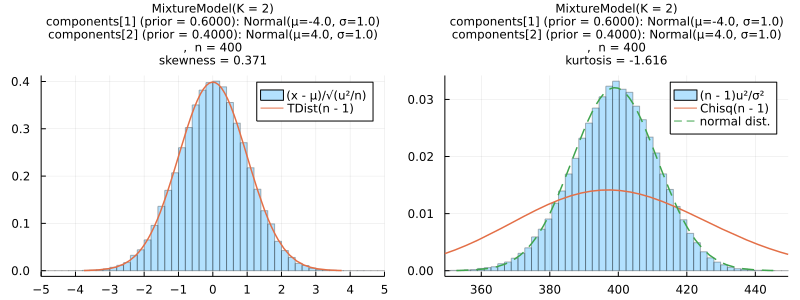

In [17]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = MixtureModel([Normal(-4, 1), Normal(4, 1)], [0.6, 0.4]), n,
        skewnessfunc=myskewness, kurtosisfunc=mykurtosis,
        titlefontsize=8, topmargin=1Plots.cm) |> display
end

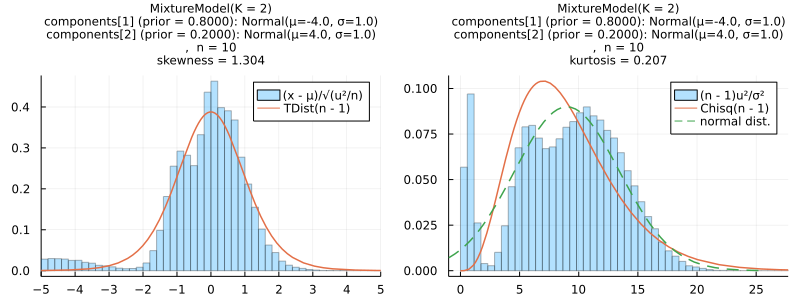

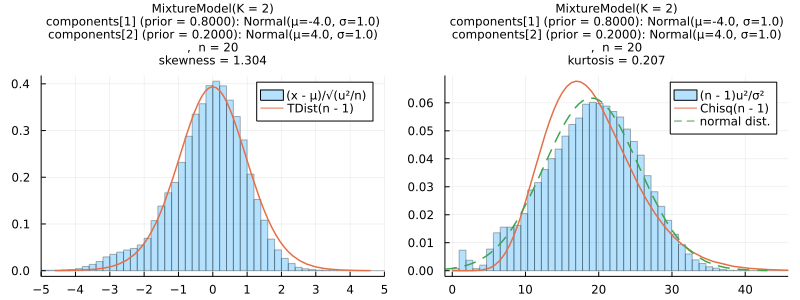

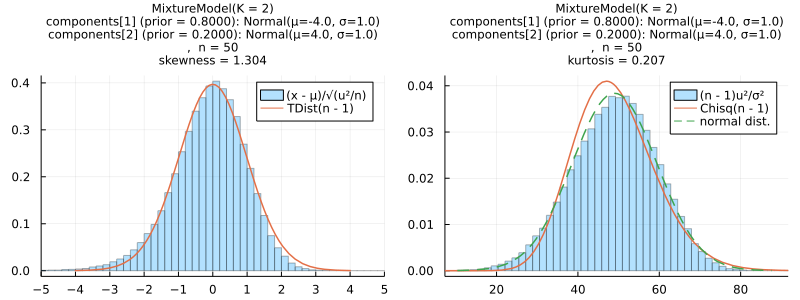

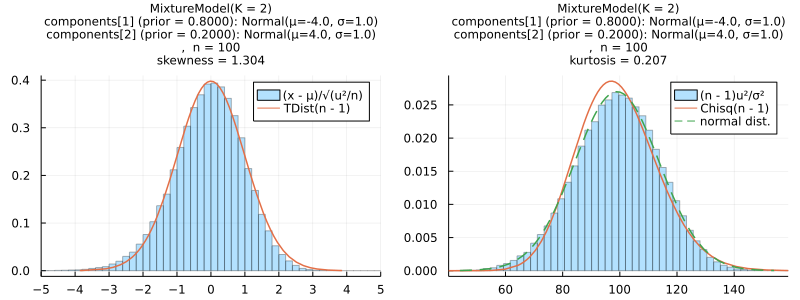

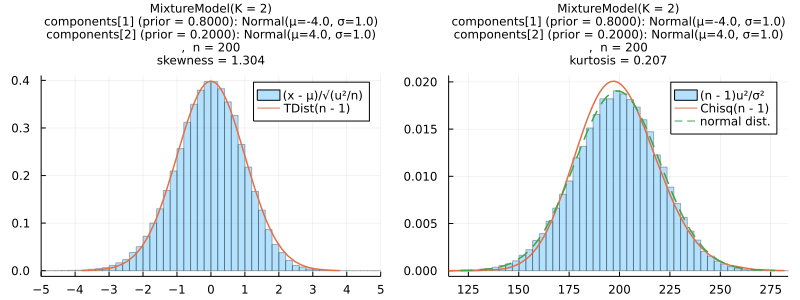

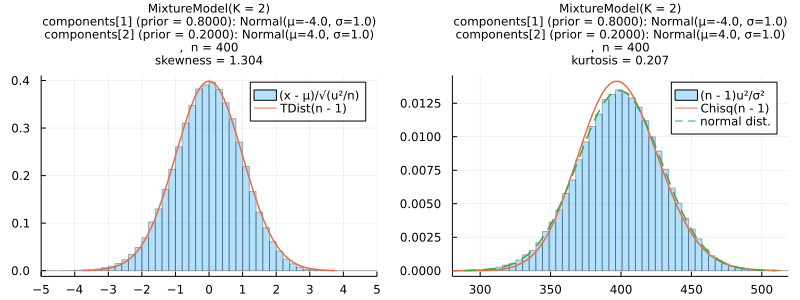

In [18]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = MixtureModel([Normal(-4, 1), Normal(4, 1)], [0.8, 0.2]), n,
        skewnessfunc=myskewness, kurtosisfunc=mykurtosis,
        titlefontsize=8, topmargin=1Plots.cm) |> display
end